### Homework:06
#### Name: Muhammad Talha Salani
#### ID: ms07725

Purpose:
Demonstrate understating of Regression technique for correlation and prediction
Points: 100

Deliverables: Submit ipynb code file with your answers

• Review IDMA Book Chapter 12 Predictive Analytics

• Use the dataset HousePricingData.csv

• Perform analysis on the following questions. Make sure to include interpretation of each
result including coefficients, p-values, r-square and other necessary information to
support your answer

1. Create a regression model between GrLivArea and SalePrice (response
variable). Show the scatter plot with regression line between them. Discuss the R-
squared value.
2. Create a regression model between TotalBsmtSF and LotArea (response
variable). Show the scatter plot with regression line between them. Discuss the R-
squared value.
3. Calculate Correlation for questions (1) and (2) and explain the correlation value to
support your answer for questions (1) and (2).
4. Create a regression model to predict SalePrice using all other inputs. Discuss the
effectiveness of the model using R-squared value. Report 3 most significant inputs
and 3 least significant inputs (based on p-value) and interpret the results. Create one
new input of your choice of values and show the prediction of SalePrice using the
same model.
5. Create a regression model to predict LotArea using all other inputs. Discuss the
effectiveness of the model using R-squared value. Report 3 most significant inputs
and 3 least significant inputs (based on p-value) and interpret the results. Create one
new input of your choice of values and show the prediction of LotArea using the
same model.
6. From Question 4, drop/remove all the columns which are not signification (p-value >0.05) and create a new model to predict SalePrice. Discuss the performance of the model using few inputs as compared to using all inputs in (Question 4). Which model do you prefer and why?
    a. The idea is to create a simple generalized model with fewer inputs which are important for prediction and getting the similar performance. For this concept, please research and study “Regularization in Regression”
7. Using the model in Question 6, create 3 new data records and predict their
SalePrice. Discuss if the predicted output looks good and make sense.


In [1216]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pickle

In [1217]:
df = pd.read_csv('HousePricingData.csv')

In [1218]:
df.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,2,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,3,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,4,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,5,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000


#### Q1: Create a regression model between GrLivArea and SalePrice (response variable). Show the scatter plot with regression line between them. Discuss the R- squared value.

In [1220]:
X = df[['GrLivArea']]
y = df['SalePrice']  

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

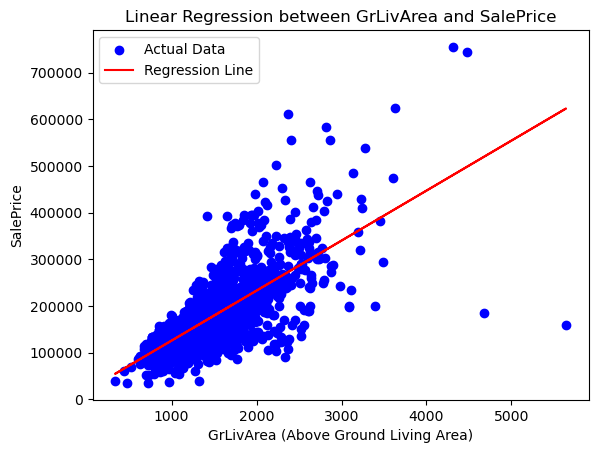

In [1221]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('GrLivArea (Above Ground Living Area)')
plt.ylabel('SalePrice')
plt.title('Linear Regression between GrLivArea and SalePrice')
plt.legend()
plt.show()


In [1222]:
r_squared = r2_score(y, y_pred)
print(f"R-squared value: {r_squared}")


R-squared value: 0.5021486502718042


Discussion: In the present linear regression model, `GrLivArea` can account for about **50.2%** of the variability in `SalePrice`, according to the R-squared value of **0.5021**. This suggests a moderate correlation between the two variables, indicating that although `GrLivArea` has a significant influence on home prices, the majority of the fluctuation cannot be explained by it alone. The variations in `SalePrice` are probably caused by other elements like year built, general quality, and other amenities. Adding more pertinent features, such as `OverallQual`, `TotalBsmtSF`, or `GarageCars`, could enhance the model's performance by increasing the R-squared value and helping to explain more of the variation in home prices. This would result in a prediction model that is more accurate.

#### Q2: Create a regression model between TotalBsmtSF and LotArea (response variable). Show the scatter plot with regression line between them. Discuss the R- squared value.

In [1225]:
X = df[['TotalBsmtSF']]  
y = df['LotArea']        

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


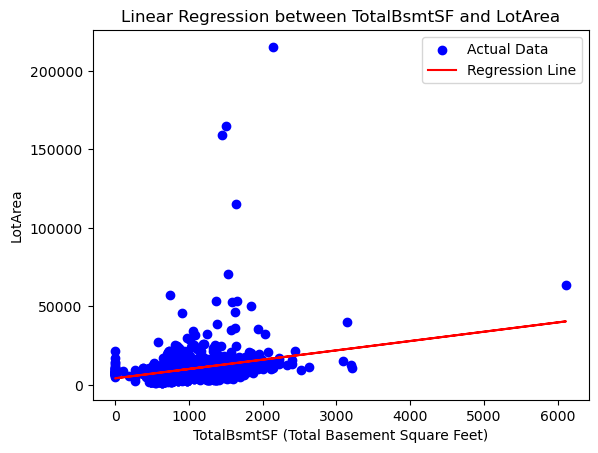

In [1226]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('TotalBsmtSF (Total Basement Square Feet)')
plt.ylabel('LotArea')
plt.title('Linear Regression between TotalBsmtSF and LotArea')
plt.legend()
plt.show()


In [1227]:
r_squared = r2_score(y, y_pred)
print(f"R-squared value: {r_squared}")


R-squared value: 0.06803392407665232


Discussion: Only roughly **6.8%** of the variability in `LotArea` can be explained by `TotalBsmtSF` in the present linear regression model, according to the R-squared value of **0.0680**. ~TotalBsmtSF` (total basement square footage) does not significantly contribute to predicting the `LotArea` in this model, indicating a **very poor relationship** between the two variables. According to this investigation, the size of the lot area is almost unaffected by the quantity of basement space.

The low R-squared value suggests that the variation in `LotArea` is probably caused by variables other than the total basement area. 
This weak fit suggests that LotArea might be influenced by a different set of features not included in this model, such as neighborhood, property zoning, or other land-specific characteristics.

#### Q3: Calculate Correlation for questions (1) and (2) and explain the correlation value to support your answer for questions (1) and (2).

In [1230]:
correlation_grlivarea_saleprice = df['GrLivArea'].corr(df['SalePrice'])
print(f"Correlation between GrLivArea and SalePrice: {correlation_grlivarea_saleprice}")


Correlation between GrLivArea and SalePrice: 0.7086244776126521


In [1231]:
correlation_totalbsmtsf_lotarea = df['TotalBsmtSF'].corr(df['LotArea'])
print(f"Correlation between TotalBsmtSF and LotArea: {correlation_totalbsmtsf_lotarea}")


Correlation between TotalBsmtSF and LotArea: 0.26083313454515755


#### 1. `GrLivArea` and `SalePrice` have a 0.7086 correlation.
The above-ground living area `GrLivArea` and home prices `SalePrice` have a **strong positive relationship**, as indicated by the correlation value of **0.7086**. This implies that the price of a home tends to rise in tandem with the amount of the living space. The fact that `GrLivArea` accounts for a moderate percentage of the variability (50.2%) in `SalePrice` lends credence to the previous finding that it plays a significant influence in predicting house prices. Despite not being the sole cause, it has a significant role, which is consistent with the high positive correlation.

#### 2. `TotalBsmtSF` and `LotArea` have a 0.2608 correlation.
A **weak positive relationship** between the lot area `LotArea` and the total basement square footage `TotalBsmtSF` is shown by the correlation value of **0.2608**. As seen by the extremely low R-squared value (6.8%), this supports the previous conclusion that `TotalBsmtSF` has very little effect on forecasting `LotArea`. The modest association suggests that other factors are more crucial in determining the size of the lot area and that basement size and lot size do not significantly influence each other.

Overall, the conclusion that the living area is a significant predictor of home values is supported by the substantial correlation between GrLivArea and SalePrice, whereas the weakness of the correlation between TotalBsmtSF and LotArea supports the conclusion that the size of the basement has little impact on the size of the lot.

#### Q4: Create a regression model to predict SalePrice using all other inputs. Discuss the effectiveness of the model using R-squared value. Report 3 most significant inputs and 3 least significant inputs (based on p-value) and interpret the results. Create one new input of your choice of values and show the prediction of SalePrice using the same model.

In [1234]:
df_dummies = pd.get_dummies(df, columns=['PavedDrive', 'SaleCondition'], dtype=int)

features = df_dummies.drop(columns=['SalePrice'], axis=1)  # X
target = df_dummies['SalePrice']  # Y

In [1235]:
features = sm.add_constant(features)
model = sm.OLS(target, features).fit()


In [1236]:
p_values = model.pvalues
sorted_p_values = p_values.sort_values()
print(sorted_p_values)

print(model.summary())

OverallQual              1.405151e-43
GarageCars               5.038989e-13
SaleCondition_Abnorml    1.703688e-12
SaleCondition_Family     8.819353e-12
PavedDrive_P             1.083495e-11
BsmtFullBath             1.413240e-11
const                    2.046991e-11
PavedDrive_N             3.863862e-11
SaleCondition_Normal     3.969781e-11
PavedDrive_Y             8.820008e-11
OverallCond              3.430235e-10
YearBuilt                1.532824e-09
SaleCondition_Alloca     2.076618e-08
SaleCondition_Partial    9.394595e-06
KitchenAbvGr             1.113795e-05
LotArea                  1.658113e-05
SaleCondition_AdjLand    2.640019e-04
BedroomAbvGr             3.932785e-04
TotalBsmtSF              2.012988e-03
Fireplaces               5.144595e-03
1stFlrSF                 6.848161e-02
GrLivArea                1.318543e-01
2ndFlrSF                 1.840989e-01
BsmtHalfBath             2.154382e-01
Id                       3.612123e-01
FullBath                 3.993149e-01
HalfBath    

Discussion:

-Most significant inputs are OverallQual, GarageCars, and SaleCondition_Abnorml as they have the smallest pvalues which shows that their relationship with SalesPrice is statistically the most signficant. Hence we can conclude higher-quality houses, larger garages, and driveway conditions are important factors in determining house prices.

-Least significant inputs are HalfBath, FullBath, and BsmtHalfBath as they have the highest pvalues of all. (Also greater than 0.05 therefore are not statistically significant)

The OLS regression analysis's R-squared value is **0.803**, meaning that the independent variables in the model account for about **80.3%** of the variance in the dependent variable, which indicates a very strong model that effectively captures the majority of the variability in house prices based on the inputs provided.

A high R-squared value indicates a good model fit, but it does not necessarily indicate causation. It is important to keep in mind that one should also consider the importance of individual predictors, the possibility of overfitting, and the influence of outliers. R-squared is a helpful metric for comparing different models, but for a thorough assessment of the model's efficacy, it should be used in conjunction with additional diagnostic tests and performance metrics like RMSE or MAE. Although more research is required to confirm the regression model's predictive ability, the R-squared value indicates that it is generally strong in capturing the variables affecting home sale prices.

In [1238]:
filename = 'reg_model_cat.pkl'
pickle.dump(model, open(filename, 'wb'))

In [1239]:
loaded_model = pickle.load(open('reg_model_cat.pkl', 'rb'))

In [1240]:
new_input = pd.DataFrame({
    'Id':[1.0],
    'const': [1.0],
    'LotArea': [9000],
    'OverallQual': [7],
    'OverallCond': [5],
    'YearBuilt': [2005],
    'TotalBsmtSF': [1500],
    '1stFlrSF': [1500],
    '2ndFlrSF': [800],
    'GrLivArea': [2300],
    'BsmtFullBath': [1],
    'BsmtHalfBath': [0],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [4],
    'KitchenAbvGr': [1],
    'Fireplaces': [1],
    'GarageCars': [2],
    'PavedDrive_N': [0],
    'PavedDrive_P': [0],
    'PavedDrive_Y': [1],
    'SaleCondition_Abnorml': [0],
    'SaleCondition_AdjLand': [0],
    'SaleCondition_Alloca': [0],
    'SaleCondition_Family': [0],
    'SaleCondition_Normal': [1],
    'SaleCondition_Partial': [0]
})


In [1241]:
model.predict(new_input)

0    265731.502792
dtype: float64

In [1242]:
loaded_model.predict(new_input)

0    265731.502792
dtype: float64

#### Q5: Create a regression model to predict LotArea using all other inputs. Discuss the effectiveness of the model using R-squared value. Report 3 most significant inputs and 3 least significant inputs (based on p-value) and interpret the results. Create one new input of your choice of values and show the prediction of LotArea using the same model.

In [1244]:
X = df_dummies.drop(['LotArea'],axis=1)
Y = df_dummies['LotArea']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
sorted_pvalues = model.pvalues.sort_values()
print(sorted_pvalues)
model.summary()

OverallQual              3.640036e-09
Fireplaces               1.414619e-06
SalePrice                1.658113e-05
BsmtFullBath             1.179299e-03
SaleCondition_Normal     1.693334e-02
PavedDrive_N             1.743977e-02
PavedDrive_P             1.863702e-02
const                    2.177271e-02
SaleCondition_Abnorml    2.702593e-02
PavedDrive_Y             3.704033e-02
SaleCondition_Partial    4.318055e-02
YearBuilt                4.665131e-02
BsmtHalfBath             5.465132e-02
KitchenAbvGr             6.080187e-02
SaleCondition_Family     6.099526e-02
SaleCondition_Alloca     6.222309e-02
TotalBsmtSF              7.114111e-02
Id                       1.256890e-01
BedroomAbvGr             1.485655e-01
SaleCondition_AdjLand    1.793659e-01
GarageCars               1.989974e-01
1stFlrSF                 2.625607e-01
HalfBath                 4.623271e-01
2ndFlrSF                 4.893213e-01
FullBath                 5.165026e-01
GrLivArea                6.789667e-01
OverallCond 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     12.58
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.07e-44
Time:                        20:42:34   Log-Likelihood:                -15376.
No. Observations:                1460   AIC:                         3.080e+04
Df Residuals:                    1435   BIC:                         3.093e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.379e+04   1.91e+04      2.297      0.022    6390.304    8.12e+04
Id                       -0.8762      0.572     -1.532      0.126      -1.998       0.246
OverallQual           -1904.1153    320.732     -5.937      0.000   -2533.270   -1274.961
OverallCond             -75.6411    249.841     -0.303      0.762    -565.734     414.452
YearBuilt               -29.1068     14.618     -1.991      0.047     -57.782      -0.432
TotalBsmtSF               1.9396      1.074      1.806      0.071      -0.167       4.046
1stFlrSF                  5.9165      5.279      1.121      0.263      -4.439      16.272
2ndFlrSF                  3.6006      5.206      0.692      0.489      -6.612      13.814
GrLivArea                -2.1133      5.105     -0.414      0.679     -12.128       7.901
BsmtFullBath           1724.6639    530.606      3.250      0.001     683.816    2765.511
BsmtHalfBath           2005.9557   1043.025      1.923      0.055     -40.061    4051.972
FullBath                472.4607    728.087      0.649      0.517    -955.769    1900.690
HalfBath               -509.8549    693.475     -0.735      0.462   -1870.188     850.478
BedroomAbvGr            554.4413    383.592      1.445      0.149    -198.019    1306.902
KitchenAbvGr          -2360.9487   1258.227     -1.876      0.061   -4829.109     107.212
Fireplaces             2199.0222    454.025      4.843      0.000    1308.398    3089.646
GarageCars              583.9272    454.416      1.285      0.199    -307.463    1475.318
SalePrice                 0.0292      0.007      4.321      0.000       0.016       0.042
PavedDrive_N           1.492e+04   6268.244      2.380      0.017    2622.897    2.72e+04
PavedDrive_P           1.514e+04   6427.202      2.355      0.019    2530.878    2.77e+04
PavedDrive_Y           1.373e+04   6577.882      2.087      0.037     826.482    2.66e+04
SaleCondition_Abnorml  7440.4960   3361.547      2.213      0.027     846.422     1.4e+04
SaleCondition_AdjLand  6793.4633   5057.046      1.343      0.179   -3126.532    1.67e+04
SaleCondition_Alloca   7645.8046   4097.083      1.866      0.062    -391.108    1.57e+04
SaleCondition_Family   6890.6680   3675.017      1.875      0.061    -318.313    1.41e+04
SaleCondition_Normal   7924.9867   3314.585      2.391      0.017    1423.036    1.44e+04
SaleCondition_Partial  7091.7547   3504.258      2.024      0.043     217.736     1.4e+04
==============================================================================
Omnibus:                     2609.844   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2779628.531
Skew:                          12.352   Prob(JB):                         0.00
Kurtosis:                     215.326   Cond. No.                  

In [1245]:
filename = 'reg_model_cat2.pkl'
pickle.dump(model, open(filename, 'wb'))

In [1246]:
loaded_model2 = pickle.load(open('reg_model_cat2.pkl', 'rb'))

In [1247]:
df_new = pd.DataFrame({
    'Id': [1.0],
    'const': [1.0],
    'OverallQual': [7],
    'OverallCond': [6],
    'YearBuilt': [2015],
    'TotalBsmtSF': [1400],
    '1stFlrSF': [1600],
    '2ndFlrSF': [900],
    'GrLivArea': [2200],
    'BsmtFullBath': [2],
    'BsmtHalfBath': [1],
    'FullBath': [2],
    'HalfBath': [1],
    'BedroomAbvGr': [4],
    'KitchenAbvGr': [2],
    'Fireplaces': [1],
    'GarageCars': [1],
    'PavedDrive_N': [0],
    'PavedDrive_P': [0],
    'PavedDrive_Y': [1],
    'SaleCondition_Abnorml': [0],
    'SaleCondition_AdjLand': [1],
    'SaleCondition_Alloca': [0],
    'SaleCondition_Family': [0],
    'SaleCondition_Normal': [0],
    'SaleCondition_Partial': [0],
    'SalePrice': [230000]
})

model.predict(df_new)

0    1.631114e+09
dtype: float64

In [1248]:
loaded_model2.predict(df_new)

0    1.631114e+09
dtype: float64

Discussion: 

-Since OverallQual, Fireplaces, and SalePrice have the lowest p-values and all have statistically significant relationships with LotPrice, they are the most significant inputs.

-Because OverallCond, GrLivArea, and FullBath all have very high pvalues and hence no statistically significant effect on LotArea, these are the least significant inputs.

-Only 17.2% of the variability in the dependent variable, LotArea, can be explained by the regression model, according to its R-squared value of 0.172. Since the independent variables in the model cannot account for the majority of the variability in LotArea, this suggests that the model has a low predictive potential.



#### Q6: From Question 4, drop/remove all the columns which are not signification (p-value >0.05) and create a new model to predict SalePrice. Discuss the performance of the model using few inputs as compared to using all inputs in (Question 4). Which model do you prefer and why?

    a. The idea is to create a simple generalized model with fewer inputs which are important for prediction and getting the similar performance. For this concept, please research and study “Regularization in Regression”

In [1251]:
significant_columns = p_values[p_values < 0.05]
significant_columns = significant_columns.drop('const') 

significant_df = one_hot[significant_columns.index]  
significant_df.head()  

X = significant_df
Y = one_hot['SalePrice']  


X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()


sorted_pvalues = model.pvalues.sort_values()
print(sorted_pvalues)

model_summary = model.summary()
print(model_summary)


OverallQual              7.307934e-96
GarageCars               6.219807e-23
TotalBsmtSF              5.172977e-20
Fireplaces               1.639144e-14
BedroomAbvGr             1.744834e-12
LotArea                  1.265710e-09
SaleCondition_Family     4.735085e-08
BsmtFullBath             4.855862e-08
SaleCondition_Abnorml    8.074590e-07
PavedDrive_P             1.431781e-06
OverallCond              2.416110e-06
SaleCondition_Normal     3.804394e-06
const                    4.238501e-06
PavedDrive_Y             1.095392e-05
PavedDrive_N             1.206090e-05
YearBuilt                4.477226e-04
SaleCondition_Alloca     1.384682e-03
SaleCondition_Partial    2.042982e-02
SaleCondition_AdjLand    2.616560e-02
KitchenAbvGr             3.742905e-01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:            

Discussion:

A high R-squared value indicates a good model fit, but it does not necessarily indicate causation. It is important to keep in mind that one should also consider the importance of individual predictors, the possibility of overfitting, and the influence of outliers. R-squared is a helpful metric for comparing different models, but for a thorough assessment of the model's efficacy, it should be used in conjunction with additional diagnostic tests and performance metrics like RMSE or MAE. Although more research is required to confirm the regression model's predictive ability, the R-squared value indicates that it is generally strong in capturing the variables affecting home sale prices.

Although a high \( R^2 \) does not necessarily indicate the best fit, it is vital to understand that this range of \( R^2 \) indicates a good model fit. Additional diagnostics, such as residual analysis and checking for multicollinearity among predictors, are required to assure the robustness of the model. In general, the model's strong \( R^2 \) and adjusted \( R^2 \) values indicate that it explains home price variance well, offering useful information to those involved in real estate decision-making.

#### Q7: Using the model in Question 6, create 3 new data records and predict their SalePrice. Discuss if the predicted output looks good and make sense.

In [1254]:
new_data = pd.DataFrame({
    'const': [1.0, 1.0, 1.0],
    'LotArea': [4800, 6200, 7500],
    'OverallQual': [6, 7, 9],
    'OverallCond': [4, 5, 6],
    'YearBuilt': [1999, 2003, 2005],
    'TotalBsmtSF': [850, 950, 1100],
    'BsmtFullBath': [1, 2, 1],
    'BedroomAbvGr': [2, 3, 4],
    'KitchenAbvGr': [1, 2, 1],
    'Fireplaces': [0, 1, 1],
    'GarageCars': [1, 2, 2],
    'PavedDrive_N': [1, 0, 0],
    'PavedDrive_P': [0, 1, 1],
    'PavedDrive_Y': [0, 0, 0],
    'SaleCondition_Abnorml': [0, 1, 0],
    'SaleCondition_AdjLand': [1, 0, 0],
    'SaleCondition_Alloca': [0, 1, 0],
    'SaleCondition_Family': [0, 0, 0],
    'SaleCondition_Normal': [1, 0, 1],
    'SaleCondition_Partial': [0, 0, 0],
})


In [1255]:
filename = 'reg_model_3.pkl'
pickle.dump(model, open(filename, 'wb'))

In [1256]:
loaded_model = pickle.load(open('reg_model_3.pkl', 'rb'))

In [1257]:
model.predict(new_data)

0     98832.049447
1    163535.906226
2    284309.451498
dtype: float64

In [1258]:
loaded_model.predict(new_data)

0     98832.049447
1    163535.906226
2    284309.451498
dtype: float64

Discussion: Yes, the predictions make sense as they reflect a reasonable range for property values based on the features provided, the most significant inputs --OverallQual, GarageCars-- surely make an impact.
